# Introduction to Tensorflow Course

### Overview

This notebook serves as a comprehensive wrap-up of the "Introduction to TensorFlow for Artificial Intelligence" course. It is designed for those new to neural networks, starting from the absolute basics and progressively building up to computer vision tasks.

### Key Concepts Covered

- **Fundamentals:** The paradigm shift from traditional programming to machine learning.

- **Core Metrics:** Understanding Loss (measuring error) and Accuracy (measuring correctness).

- **Deep Neural Networks (DNNs):** Moving from simple regression to multi-class classification (e.g., Fashion MNIST).

- **Computer Vision:** Implementing Convolutional Neural Networks (CNNs) to detect features like edges and shapes.

- **Real-World Data:** Using ImageDataGenerator to handle complex, raw image datasets (e.g., Horses vs. Humans).

# 1. The "Hello World" of Neural Networks

Before we build complex computer vision models, let's understand how a neural network "learns" using the simplest possible example.

### Traditional Programming vs. Machine Learning

* **Traditional Programming:** You give the computer **Rules** (code) and **Data**. The computer gives you **Answers**.
* **Machine Learning:** You give the computer **Answers** and **Data**. The computer learns the **Rules**.

### The Problem
Imagine you have these two sets of numbers:

| X | -1 | 0 | 1 | 2 | 3 | 4 |
|---|---|---|---|---|---|---|
| **Y** | -3 | -1 | 1 | 3 | 5 | 7 |

If you look at this, you can probably guess the rule: **multiply X by 2 and subtract 1**.
$$Y = 2X - 1$$

In the code below, we will feed these numbers to a Neural Network. The network has no idea what the math formula is. It will look at the X's and Y's and try to figure out the relationship (the rule) by itself.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the Data (The "Answers" and the "Data")
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# 2. Define the Model
# We use a Single Neuron (units=1) in a Single Layer (input_shape=[1])
# This is the simplest possible neural network.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# 3. Compile the Model
# SGD (Stochastic Gradient Descent) = The optimizer (how the model guesses)
# MSE (Mean Squared Error) = The loss function (how the model measures how wrong it is)
model.compile(optimizer='sgd', loss='mean_squared_error')

# 4. Train the Model
# The model will try to "fit" the X data to the Y data 500 times (epochs)
print("Training the model...")
history = model.fit(xs, ys, epochs=500, verbose=1)
print("Finished training!")

# 5. Make a Prediction
# Now that the model has learned, let's ask it to predict Y for X = 10
prediction = model.predict(np.array([10.0]))
print(f"\nIf X is 10, the model predicts Y is: {prediction[0][0]:.2f}")
print("The correct answer is 19.0 (2 * 10 - 1). The model is very close!")

Training the model...
Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 39.7894
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 31.6584
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 25.2541
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 20.2084
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 16.2317
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 13.0962
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.6226
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.6700
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.1273
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 5.9073
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 4.9413
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 4.1753
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.5667
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.0821
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - lo

## Understanding the Components

In the code below, we define the simplest possible neural network. Let's break down the technical terms:

### 1. The Layer: `keras.layers.Dense(units=1)`
We are building a model with **1 layer** containing **1 neuron** (`units=1`).
* **Dense:** This is the most common type of layer in neural networks. "Dense" means that every neuron in this layer is connected to every neuron in the previous layer.
* Since this is the first and only layer, it connects directly to the input ($X$).

### 2. The Loss Function: `'mean_squared_error'`
When the computer makes a guess (e.g., "I think for X=10, Y is 50"), it needs to know how wrong it was.
* **Loss:** A number that represents the "error". If the guess is perfect, Loss is 0. If the guess is terrible, Loss is high.
* **Mean Squared Error (MSE):** We calculate the difference between the *guess* and the *real answer*, square it (to make it positive and punish large errors), and average it.

### 3. The Optimizer: `'sgd'` (Stochastic Gradient Descent)
Knowing the error isn't enough; the computer needs to know **how to fix it**.
* **Optimizer:** This is the mathematical logic that adjusts the internal "weights" of the neuron to reduce the loss.
* **SGD:** Imagine you are on a foggy mountain and want to get to the bottom (Loss = 0). You look at the slope (gradient) at your feet and take a step downhill. SGD does this repeatedly to find the best fit.

### 4. The Training Loop: `model.fit(epochs=500)`
This is where the learning happens. We run a loop 500 times (`epochs`):
1.  **Guess:** The model takes $X$ and predicts $Y$.
2.  **Measure:** It calculates the **Loss** (MSE).
3.  **Optimize:** It uses **SGD** to adjust its internal math to make a slightly better guess next time.

### Visualizing the Result

Now that the model has been trained, let's visualize what happened.
We will plot:
1.  **The Real Data:** The original 6 points we gave the model (Blue Dots).
2.  **The Learned Rule:** The line the model thinks fits the data best (Red Line).

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


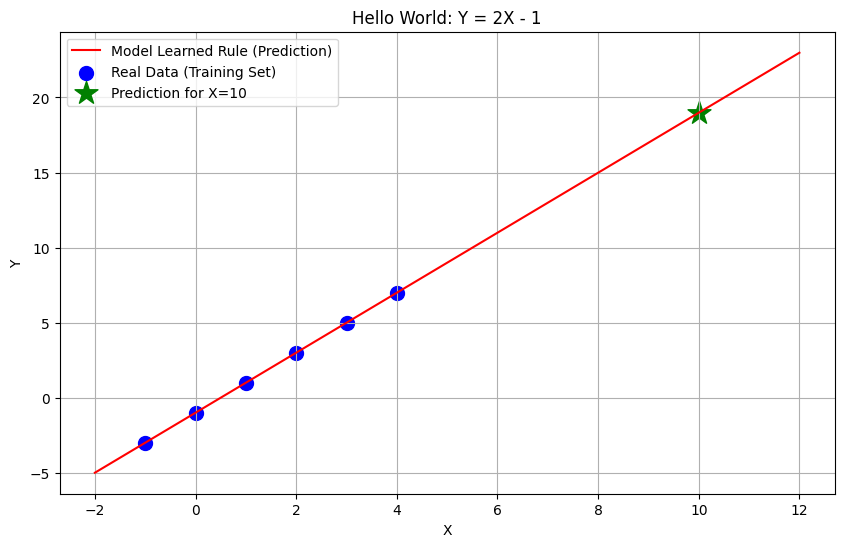

In [ ]:
# Create a larger range of X values to visualize the line the model learned
# We generate 50 points between -2 and 12
plot_xs = np.linspace(-2, 12, 50)

# Ask the model to predict Y for all these new X values
plot_preds = model.predict(plot_xs)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the model's learned line (Red)
plt.plot(plot_xs, plot_preds, 'r-', label='Model Learned Rule (Prediction)')

# Plot the original training data (Blue Dots)
plt.scatter(xs, ys, c='b', s=100, label='Real Data (Training Set)')

# Highlight the prediction we made for X=10 (Green Star)
plt.scatter([10], prediction, c='g', marker='*', s=300, label='Prediction for X=10')

plt.title('Hello World: Y = 2X - 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# 2. The Limitation of Deep Neural Networks (Module 2)

In Module 2, we tried to classify images of clothing (Fashion MNIST) using the same "Dense" layers we used for the $Y=2X-1$ problem.

### The "Flatten" Problem
To feed an image ($28 \times 28$ pixels) into a Dense layer, we had to "Flatten" it into a single long list of 784 pixels.
* **What we lost:** The relationship between neighboring pixels. The network didn't know that a pixel at row 1, col 1 was next to row 1, col 2. It treated them as completely independent numbers.
* **The Result:** The model could recognize simple patterns based on pixel intensity, but it struggled with complex shapes or if the object moved slightly to the left or right.

**Solution:** We need a way to look at the image *as an image*, preserving its 2D structure. Enter **Convolutions**.

# 3. Computer Vision & Convolutions (Module 3)

A **Convolution** is a filter (like a $3 \times 3$ grid) that passes over the image, scanning for specific features.

* **Filters:** One filter might look for vertical lines. Another might look for horizontal lines.
* **Pooling:** After finding features, we use **MaxPooling** to shrink the image, keeping only the strongest features and discarding the noise.

In the code below, we will:
1.  Load the **Fashion MNIST** dataset (70,000 images of clothes).
2.  Build a **CNN** (Convolutional Neural Network).
3.  Visualize how the network transforms a picture of a shoe into abstract features (edges).

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load the Data
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# Reshape for the CNN
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# 2. Build the CNN Model
model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # First Convolution + Pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second Convolution + Pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Classifier Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Train the Model (With Validation!)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training CNN on Fashion MNIST...")

model.fit(training_images, training_labels,
          epochs=5,
          validation_data=(test_images, test_labels),
          verbose=1)

Training CNN on Fashion MNIST...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7899 - loss: 0.5937 - val_accuracy: 0.8798 - val_loss: 0.3292
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.8928 - loss: 0.2942 - val_accuracy: 0.8900 - val_loss: 0.2995
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9109 - loss: 0.2440 - val_accuracy: 0.9050 - val_loss: 0.2542
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.9230 - loss: 0.2106 - val_accuracy: 0.9076 - val_loss: 0.2560
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9297 - loss: 0.1821 - val_accuracy: 0.9067 - val_loss: 0.2613


## Understanding the Concepts

Now that the model is trained, let's break down the "Magic Words" we used to build it.

### 1. Convolution and Pooling (The "Eyes" of the Network)
Why do we always put them together? Think of them as a two-step process: **Detect & Summarize**.

* **Convolution (`Conv2D`):** This layer acts like a set of **filters** or "eyes." It slides over the image looking for specific features—like vertical lines, horizontal curves, or corners. If it finds a feature, it highlights it.
* **Max Pooling (`MaxPooling2D`):** This layer looks at the highlighted features found by the convolution and asks: *"What is the most important thing in this small area?"* It keeps only the strongest value (the maximum) and throws away the rest.
    * **Why one after the other?** Convolution finds the details. Pooling reduces the image size (making the model faster) and makes it "translation invariant" (so it recognizes a shoe whether it's in the center or slightly to the left).

### 2. Activation Functions (`Relu` vs `Softmax`)
Activation functions decide "how much" a neuron should fire.

* **ReLU (Rectified Linear Unit):** Used inside the hidden layers.
    * *The Rule:* "If the value is negative, make it 0. If it's positive, keep it."
    * *Why?* It helps the model focus only on useful features and ignore noise (negative values). It also adds "non-linearity," allowing the model to learn complex shapes.
* **Softmax:** Used only in the **Output Layer**.
    * *The Rule:* "Take these raw numbers (logits) and turn them into probabilities that add up to 100%."
    * *Why?* If we have 10 classes (like Fashion MNIST), Softmax might say: "There is a 90% chance this is a Boot, and a 1% chance it is a Shirt." We pick the highest probability as the answer.

### 3. The Optimizer: `Adam`
* **What it is:** Adam is an "upgrade" to the standard SGD (Stochastic Gradient Descent) we used in the first example.
* **How it works:** Instead of taking steps of the same size every time, Adam adapts. It takes bigger steps when it's confident and smaller, more careful steps when it gets close to the solution. It is generally faster and more efficient for image classification.

### 4. The Loss: `sparse_categorical_crossentropy`
* **Crossentropy:** This is the standard way to measure error for classification. It heavily penalizes the model if it is confident and wrong (e.g., saying "I am 100% sure this shoe is a shirt").
* **"Sparse":** This keyword is a programming convenience.
    * If your labels were **One-Hot Encoded** (e.g., `[0, 0, 1, 0...]` for class 2), you would use `categorical_crossentropy`.
    * Since our labels are just integers (e.g., the number `9` for Ankle Boot), we use `sparse_categorical_crossentropy`. It saves memory!

### 5. Loss vs. Accuracy
* **Loss:** The "Teacher." It is a math number used *during* training to guide the optimizer. You want this to go down (close to 0).
* **Accuracy:** The "Report Card." It is a percentage used for *humans* to understand performance. You want this to go up (close to 100% or 1.0).

Visualizing the effect of Convolutions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


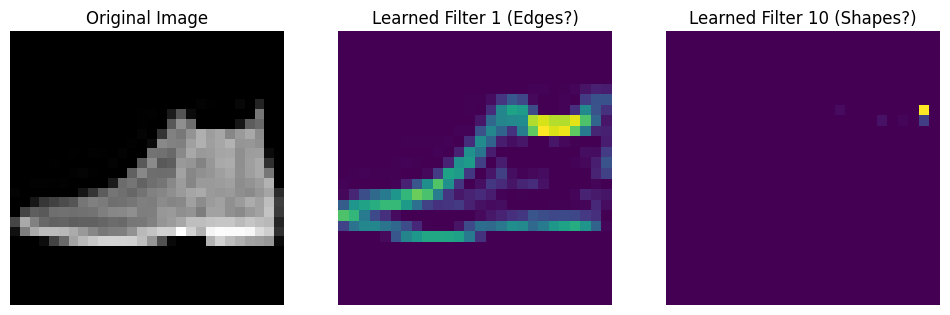

In [ ]:
import numpy as np

print("Visualizing the effect of Convolutions...")

# ==========================================
# VISUALIZATION CODE
# ==========================================

# 1. Select an image (Ankle Boot at index 0)
img_index = 0
image = test_images[img_index]

# 2. Create a new model that outputs the internal layers
# We get the output of the first 4 layers (Conv -> Pool -> Conv -> Pool)
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

# 3. Predict (Pass the image through the network)
activations = activation_model.predict(test_images[img_index].reshape(1, 28, 28, 1))
first_layer_activation = activations[0] # Output of the first Conv2D layer

# 4. Plotting
plt.figure(figsize=(12, 4))

# Plot Original Image
plt.subplot(1, 3, 1)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot Learned Filter 1 (What the 1st filter sees)
plt.subplot(1, 3, 2)
plt.imshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.title("Learned Filter 1 (Edges?)")
plt.axis('off')

# Plot Learned Filter 10 (What the 10th filter sees)
plt.subplot(1, 3, 3)
plt.imshow(first_layer_activation[0, :, :, 10], cmap='viridis')
plt.title("Learned Filter 10 (Shapes?)")
plt.axis('off')

plt.show()

### What are we looking at?

* **Original Image:** You can clearly see it is an ankle boot.
* **Learned Filters:** Notice how the other images look like "ghosts" or outlines of the boot.
    * Some filters might make the **vertical lines** bright (detecting the sides of the boot).
    * Others might highlight the **horizontal lines** (the sole of the boot).
    
This proves that the Neural Network isn't just memorizing pixels; it is learning to "see" the **edges and shape** of the object!

## 🔎 Decoding the "Black Box"
This code block might look complex, but it is doing something very cool: it is performing "surgery" on our trained model to see inside.

### Step 1: Select a Test Image
```python
img_index = 0
image = test_images[img_index]
```
We pick one image from our test set (in this case, an Ankle Boot) to serve as our subject.

### Step 2: Create an "X-Ray" Model
```python
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
```

Normally, a model inputs an **Image** and outputs a **Class Label** (e.g., "Boot"). Here, we create a new model that shares the same internal math (weights) as our trained model, but we change the output.

- New Output: It returns the results of the first 4 layers (Conv → Pool → Conv → Pool) instead of the final classification.

- It effectively lets us hook into the internal wiring of the network.

### Step 3: Get the Activations

```python
activations = activation_model.predict(...)
first_layer_activation = activations[0]
```

We pass our boot image through this new model.

- **Activations:** These are the "feature maps." They represent how strongly each filter reacted to parts of the image.
- `activations[0]` gives us the result of the very first layer (Conv2D).

### Step 4: Visualizing Specific Filters
```python
plt.imshow(first_layer_activation[0, :, :, 1], cmap='viridis')
```

The output of a Convolution layer is a 4D block of numbers: `(Batch, Height, Width, Filters)`. To plot it, we need to slice it:

- `0`: We take the first image in the batch.

- `:, :`: We take all the pixels (height and width).

- `1`: We look specifically at Filter #1 (Channel 1).

What do the colors mean? We use `cmap='viridis'` (a color map).

- **Dark/Purple:** The filter did not see anything interesting here (Value near 0).

- **Yellow/Green:** The filter "fired" strongly here! It found the specific pattern (like a vertical line) it was looking for.

### To get a better training we can add an early stopping to prevent overfitting

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Define the Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check if accuracy is greater than 95%
    if(logs.get('accuracy') > 0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# 2. Load and Normalize Data
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and Reshape
training_images = training_images / 255.0
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)

# 3. Build the Deep CNN Model (4 Conv Layers)
model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # 1st Convolution + Pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # 2nd Convolution + Pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten and Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 4. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train
print("Starting training Deep CNN...")
history = model.fit(training_images, training_labels, epochs=5, validation_data=(test_images, test_labels))

Starting training Deep CNN...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.7934 - loss: 0.5695 - val_accuracy: 0.8813 - val_loss: 0.3272
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.8918 - loss: 0.2944 - val_accuracy: 0.9023 - val_loss: 0.2718
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9105 - loss: 0.2404 - val_accuracy: 0.9037 - val_loss: 0.2637
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9251 - loss: 0.1972 - val_accuracy: 0.9054 - val_loss: 0.2532
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9377 - loss: 0.1641 - val_accuracy: 0.9118 - val_loss: 0.2512


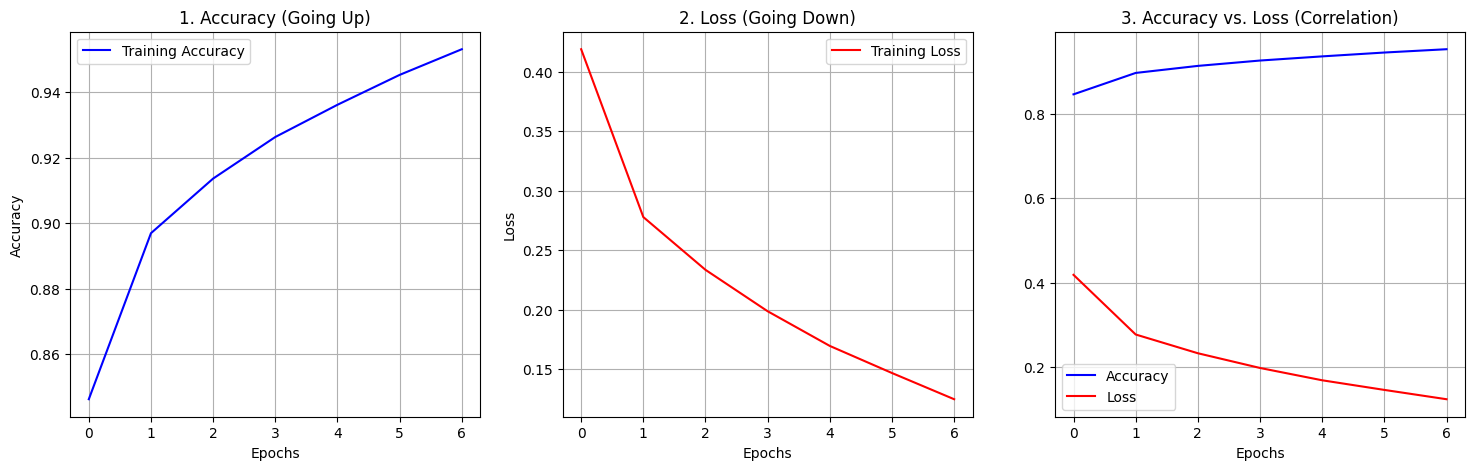

In [ ]:
import matplotlib.pyplot as plt

# Retrieve data from history
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(len(acc))

# Create a wide figure to hold 3 graphs
plt.figure(figsize=(18, 5))

# --- Graph 1: Accuracy Only ---
plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, 'b', label='Training Accuracy')
plt.title('1. Accuracy (Going Up)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Graph 2: Loss Only ---
plt.subplot(1, 3, 2)
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.title('2. Loss (Going Down)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Graph 3: Accuracy & Loss Combined ---
plt.subplot(1, 3, 3)
plt.plot(epochs_range, acc, 'b', label='Accuracy')
plt.plot(epochs_range, loss, 'r', label='Loss')
plt.title('3. Accuracy vs. Loss (Correlation)')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

plt.show()

## 📉 Understanding the Graphs & Overfitting

The graphs above tell the story of your model's "schooling."

### 1. The Left Graph: Accuracy
* **What it shows:** The percentage of images classified correctly.
* **Trend:** It starts low and shoots up quickly.
* **Goal:** We want this to be high (close to 1.0 or 100%).
* **Observation:** Notice how it curves and then flattens out? This means the model is reaching its limit on how much it can learn from this data.

### 2. The Center Graph: Loss
* **What it shows:** The "error" or confidence of the model.
* **Trend:** It starts high and drops quickly.
* **Goal:** We want this to be low (close to 0).

### 3. The Right Graph: Accuracy vs. Loss (Combined)
* **What it tracks:** The **Inverse Correlation**.
* **The Insight:** This graph proves that **Accuracy and Loss are opposites**.
    * As the **Red line (Loss)** goes DOWN...
    * The **Blue line (Accuracy)** goes UP.
* **The "X" Shape:** You will often see these lines cross each other like an "X". This crossing point usually marks where the model stops guessing randomly and starts actually understanding the data.
---

### 🧠 Why does this prevent Overfitting?

**What is Overfitting?**
Imagine a student who memorizes the answers to a practice test instead of learning the concepts.
* They get 100% on the **Practice Test** (Training Data).
* They fail the **Real Exam** (Test/Real World Data).

In Neural Networks, if you train for too long (e.g., 100 epochs), the model starts to memorize the specific noise and pixels of the training images (like the background texture) instead of the shape of the object.

**How the Callback Helps:**
By using **Early Stopping** (the `Callback`), we effectively say:
> *"Once you reach 95% accuracy, stop studying! You know enough."*

This prevents the model from continuing to train unnecessarily, which saves time and reduces the risk of the model "memorizing" the data rather than "learning" it.

# 4. The Final Challenge: Real-World Images (Horses vs. Humans)

In the previous modules, we used datasets (MNIST) that were:
1.  **Pre-processed:** All images were already the same size ($28 \times 28$).
2.  **Grayscale:** Only 1 color channel (black & white).
3.  **Centered:** The object was always in the middle.

**The Real World is Messy.**
Real photos have different sizes, aspect ratios, colors, and backgrounds. We cannot just load them all into a NumPy array like we did before (it would crash the RAM!).

### The Solution: `ImageDataGenerator`
We will use a TensorFlow tool that acts like a pipeline.
* **Source:** It looks at a folder on your computer.
* **Process:** It grabs a few images (a batch), resizes them on the fly, and converts them to numbers.
* **Destination:** It feeds them to the Neural Network.

### The Dataset
We will use **Horses vs. Humans**.
* **Goal:** Binary Classification (Is it a Horse or a Human?)
* **Input:** $300 \times 300$ pixel color images (RGB).
* **Output:** A single number between 0 and 1.

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Download the Dataset (Using the new, correct URLs)
# Training Data
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

# Validation Data (Good practice to have!)
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

# 2. Unzip the Dataset
# Extract Training Data
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

# Extract Validation Data
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# Define our directories
train_dir = '/tmp/horse-or-human'
validation_dir = '/tmp/validation-horse-or-human'

# 3. Create the Data Generators
# Rescale pixel values (0-255) to (0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# 4. Flow from Directory (Load images from disk)
print("\nSetting up the Training Generator...")
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=79,
        class_mode='binary')

print("\nSetting up the Validation Generator...")
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

--2026-02-06 14:35:40--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.207, 142.251.111.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   186MB/s    in 0.8s    

2026-02-06 14:35:41 (186 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2026-02-06 14:35:41--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.207, 142.251.111.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip

## Building the "Color" Model

We need to make three major changes to our CNN Architecture:

1.  **Input Shape:** `(300, 300, 3)`.
    * 300x300 pixels (High Resolution).
    * **3 Channels** (Red, Green, Blue). In MNIST, this was just 1.
2.  **Depth:** Because the image is so big ($300 \times 300 = 90,000$ pixels), we need **5 Convolutional Layers**. Each layer cuts the image size in half, boiling it down to the essential features.
3.  **The Output:** `Sigmoid` Activation.
    * **Softmax** (used before) is for choosing 1 out of *Many* (Class A, B, C, D...).
    * **Sigmoid** is for choosing 1 out of *Two* (0 or 1). It pushes the answer towards 0 (Horse) or 1 (Human).

In [2]:
from tensorflow.keras.optimizers import RMSprop

# 1. Define Callback for Validation Accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check 'val_accuracy' instead of 'accuracy'
    current_val_acc = logs.get('val_accuracy')

    if(current_val_acc is not None and current_val_acc > 0.80):
      print(f"\nReached 95% Validation Accuracy ({current_val_acc*100:.2f}%) so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# 2. Build the Model
model = tf.keras.models.Sequential([
    # Input shape: 300x300 images with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    # Sigmoid for Binary Classification (0 = Horse, 1 = Human)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 3. Compile (Using RMSprop)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

# 4. Train with Callback and Validation
print("Training on Real World Images...")
history = model.fit(
      train_generator,
      steps_per_epoch=13,
      epochs=35,
      callbacks=[callbacks],
      validation_data=validation_generator,
      validation_steps=8,
      verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Training on Real World Images...
Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 105s 8s/step - accuracy: 0.5598 - loss: 0.6785 - val_accuracy: 0.7305 - val_loss: 0.6440
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 105s 8s/step - accuracy: 0.7236 - loss: 0.6244 - val_accuracy: 0.5703 - val_loss: 0.5998
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7586 - loss: 0.5411
Reached 95% Validation Accuracy (89.06%) so cancelling training!
13/13 ━━━━━━━━━━━━━━━━━━━━ 121s 9s/step - accuracy: 0.7593 - loss: 0.5404 - val_accuracy: 0.8906 - val_loss: 0.4699


In [5]:
# 1. Save the Model
# H5 is a common format for Keras models
model.save('my_horse_human_model.h5')

print("Model saved as 'my_horse_human_model.h5'!")

# 2. Download it to your local computer (Optional - for Colab)
from google.colab import files
files.download('my_horse_human_model.h5')

# Other format to save model

# Recommended format to save model
model.save('my_horse_human_model.keras')

# Download it to your local computer (Optional - for Colab)
from google.colab import files
files.download('my_horse_human_model.keras')

Model saved as 'my_horse_human_model.h5'!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🔧 Under the Hood: Optimizers & Learning Rates

You might notice we used `RMSprop` instead of `Adam` for this model. Let's understand why.

### 1. What is the Learning Rate (`lr=0.0001`)?
Think of the Loss Function as a mountain valley, and the "Perfect Model" is at the very bottom.
* **The Learning Rate** is the size of the step you take downhill.
* **Too Small (e.g., 0.000001):** You will get there, but it might take 1,000 years (epochs).
* **Too Big (e.g., 0.1):** You might take a huge jump and completely miss the bottom, bouncing back and forth forever.
* **0.0001:** This is the "Goldilocks" number—a standard starting point that usually works well for most problems.

### 2. Why RMSprop? Why not Adam?
Both are excellent optimizers, and for a simple problem like this, **Adam** would actually work just fine! However, `RMSprop` is often preferred for **Computer Vision** tasks (Convolutional Neural Networks) for a few historical and technical reasons:

* **SGD (Stochastic Gradient Descent):** The basic optimizer. It takes fixed steps. It gets stuck easily in "flat" areas.
* **RMSprop (Root Mean Square Propagation):** It is "adaptive." It looks at the recent history of steps. If the landscape is steep, it takes smaller steps to be careful. If it's flat, it speeds up. This makes it very stable for processing mini-batches of images.
* **Adam (Adaptive Moment Estimation):** It combines RMSprop with "Momentum" (like a heavy ball rolling down a hill).
    * *The Risk:* Sometimes, Adam's momentum can cause it to "overshoot" the target slightly in complex image landscapes.
    * *The Choice:* We use RMSprop here because it allows us to control the learning rate very precisely without the extra complexity of momentum.

**Summary:** Think of RMSprop as a careful hiker who adjusts their stride based on the terrain, while Adam is a hiker who also runs and builds up speed.

---

## 🛑 A Note on Performance & Limitations

You might wonder: *Why stop at 85% validation accuracy? Can't we get to 99%?*

In this specific module, we are facing the **"Small Data" Challenge** while strictly adhering to foundational techniques.

### 1. The Constraints
We are currently limited to:
* **No Data Augmentation:** We cannot artificially rotate, zoom, or flip images to create "more" data. The model only sees the exact poses in the training set.
* **No Regularization (Dropout):** We cannot use techniques like `Dropout` to randomly turn off neurons, which is the standard way to fight overfitting in deep networks.
* **Small Dataset:** We only have ~500 images per class. A deep neural network can easily "memorize" 500 images (Overfitting) rather than learning the general features of a "Horse".

### 2. The Trade-off
Without these advanced tools, pushing the Training Accuracy to 99% almost always causes the Validation Accuracy to crash (the "Exploding Loss" we saw earlier).

**The 85% Stop:**
Achieving **~85% accuracy on unseen data** with a simple CNN and no augmentation is actually a strong baseline. It represents the limit of what a basic model can learn from a small dataset before it starts hallucinating patterns that don't exist.

*> **Note:** In future courses (Course 2 of this specialization), we will introduce **Data Augmentation** and **Dropout**, which will allow us to smash through this barrier and reach >99% accuracy!*

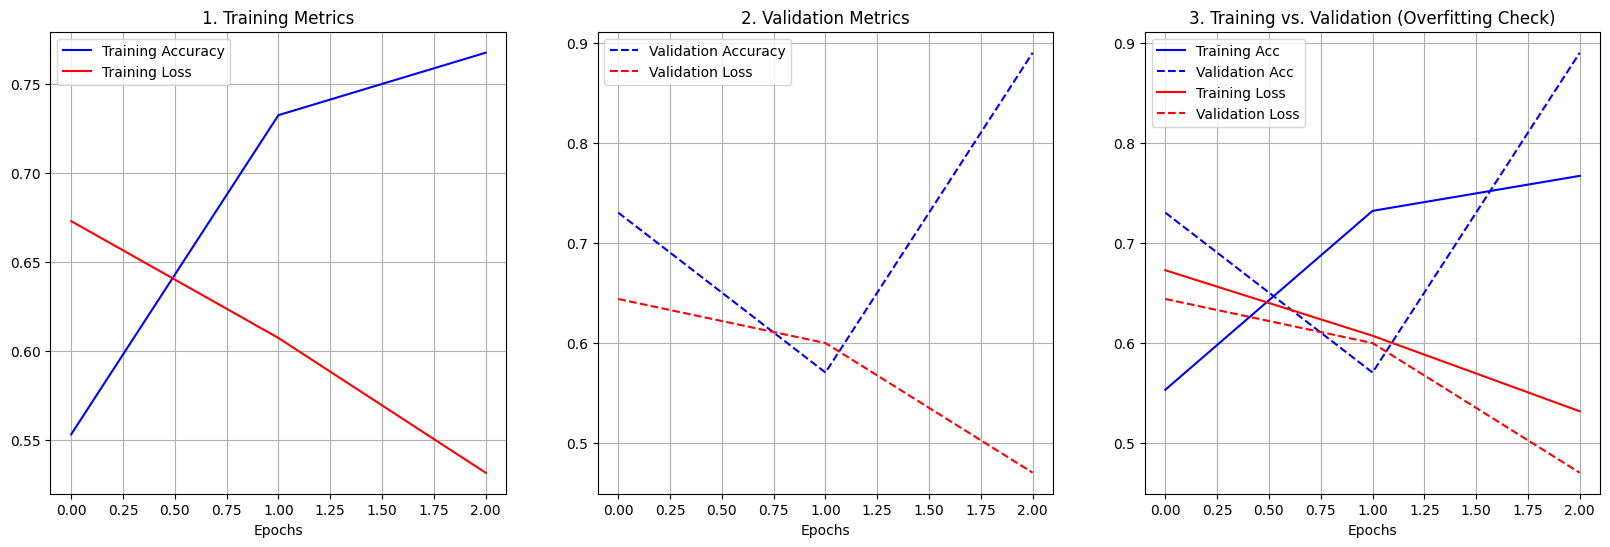

In [3]:
import matplotlib.pyplot as plt

# 1. Retrieve data from history
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# 2. Create a wide figure to hold 3 graphs
plt.figure(figsize=(20, 6))

# --- Graph 1: Training Metrics (What the model 'thinks' it knows) ---
plt.subplot(1, 3, 1)
plt.plot(epochs_range, acc, 'b', label='Training Accuracy')
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.title('1. Training Metrics')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

# --- Graph 2: Validation Metrics (How it performs on new data) ---
plt.subplot(1, 3, 2)
plt.plot(epochs_range, val_acc, 'b--', label='Validation Accuracy')
plt.plot(epochs_range, val_loss, 'r--', label='Validation Loss')
plt.title('2. Validation Metrics')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

# --- Graph 3: The Comparison (Checking for Overfitting) ---
# This is the most important graph!
plt.subplot(1, 3, 3)
plt.plot(epochs_range, acc, 'b', label='Training Acc')
plt.plot(epochs_range, val_acc, 'b--', label='Validation Acc')
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'r--', label='Validation Loss')
plt.title('3. Training vs. Validation (Overfitting Check)')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

plt.show()

## 🧪 The Ultimate Test: Try it Yourself!

The coolest part of computer vision is seeing it work on *your* data.

The code below allows you to **upload an image from your computer** (find a picture of a horse or a human on Google and save it). The model will resize it, analyze it, and tell you what it sees.

In [7]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

# 1. Upload the file
uploaded = files.upload()

for fn in uploaded.keys():

  # 2. Preprocess the image
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255.0  # Don't forget to normalize!
  x = np.expand_dims(x, axis=0)

  # 3. Run Prediction
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(f"\nPrediction Value: {classes[0][0]}")

  # 4. Interpret Result
  if classes[0] > 0.5:
    print(f"Result: {fn} is a HUMAN 🧍")
  else:
    print(f"Result: {fn} is a HORSE 🐴")

Saving Human_test_image.png to Human_test_image.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

Prediction Value: 0.7889243960380554
Result: Human_test_image.png is a HUMAN 🧍


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Conclusion

In this project, I moved from basic regression (loss: MSE) to more complex image classification tasks (loss: Binary Crossentropy). I learned that while deep dense networks work well for simple data, convolutional networks are essential for preserving spatial information in images. Finally, I discovered the importance of model capacity—sometimes a smaller model performs better on small datasets by avoiding overfitting.

The final problem was not fully solved due to limitations of the techniques covered in this course, but in future courses I plan to return to this example (horses vs. humans) and provide a proper solution.